# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Adelia Clara Langitan
- **Email:** adelialangitann@gmail.com
- **ID Dicoding:** MC309D5X1795

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah peminjaman sepeda selama satu tahun terakhir, dan kapan puncak permintaan tersebut terjadi?
- Bagaimana efektivitas sistem penyewaan sepeda dalam memenuhi kebutuhan transportasi pada hari kerja jika dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

Kode di atas mencakup beberapa pustaka yang umum digunakan dalam analisis data serta visualisasi di Python. Pustaka pandas berfungsi untuk mengolah data dalam format tabel, sementara numpy mendukung perhitungan numerik dan manipulasi array. Untuk keperluan visualisasi, matplotlib. pyplot menjadi dasar dalam pembuatan grafik, sedangkan seaborn menambahkan daya tarik dan keinformasian pada tampilan grafik tersebut. Selain itu, terdapat pustaka datetime yang berguna dalam pengolahan data terkait tanggal dan waktu, serta calendar yang dapat digunakan untuk menampilkan informasi kalender ataupun mendapatkan nama hari dari suatu tanggal tertentu. Semua pustaka ini sering digunakan secara bersamaan untuk mendukung eksplorasi dan analisis data.

## Data Wrangling

### Gathering Data

Pada tahap awal Data Wrangling, yaitu proses Pengumpulan Data, langkah pertama yang perlu dilakukan adalah menyimpan dataset yang akan digunakan dalam bentuk objek DataFrame. Untuk mencapai ini, kita dapat memanfaatkan fungsi read_csv() dari modul Pandas. Fungsi ini memungkinkan kita untuk membaca file CSV dan mengubahnya menjadi struktur data yang lebih mudah untuk diolah.

In [3]:
day_data = pd.read_csv("day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_data = pd.read_csv("hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1.   Dataset day_data merekam jumlah penyewaan sepeda setiap harinya. Terdapat beberapa kolom yang menyajikan informasi penting, antara lain tanggal (dteday), musim (season), kondisi cuaca (weathersit), serta jumlah total penyewaan sepeda (cnt). Selain itu, faktor-faktor lingkungan seperti suhu (temp), suhu yang dirasakan (atemp), kelembaban (hum), dan kecepatan angin (windspeed) juga dicatat. Informasi tambahan lain yang disediakan mencakup apakah hari tersebut adalah hari kerja (workingday) atau hari libur (holiday).
2.   Dataset hour_data menawarkan cakupan yang lebih mendetail karena mencatat jumlah penyewaan sepeda setiap jam. Struktur datanya sebanding dengan day_data, namun dilengkapi dengan informasi tambahan seperti jam (hr). Hal ini memungkinkan kita untuk melakukan analisis yang lebih mendalam terhadap pola penyewaan sepeda sepanjang satu hari.
3. Instant berfungsi sebagai nilai unik untuk setiap catatan.
4. Season menggambarkan musim dalam format angka.
5. Tahun, bulan, dan jam masing-masing diwakili oleh yr, mnth, dan hr. Hari libur akan bernilai 1, sedangkan hari biasa bernilai 0.
6. Weekday diwakili dalam angka, dengan 0 untuk Minggu, 1 untuk Senin, dan seterusnya hingga 6 untuk Sabtu.
7. Casual menunjukkan jumlah pengguna kasual yang tidak terdaftar, sedangkan registered mencerminkan jumlah pengguna yang sudah terdaftar.
8. Cnt adalah total penyewaan sepeda, yang merupakan hasil penjumlahan antara jumlah pengguna casual dan registered.

### Assessing Data

### Evaluasi Tabel *day_data*

Langkah pertama dalam proses penilaian data untuk DataFrame "day_df" adalah menggunakan metode. info(). Metode ini memberikan gambaran menyeluruh mengenai struktur DataFrame, yang mencakup:

1. Jenis objek DataFrame yang digunakan.
2. Rentang indeks dalam DataFrame.
3. Total kolom yang tersedia.
4. Daftar nama kolom beserta jumlah entri yang tidak kosong (not-null) serta tipe data masing-masing kolom.
5. Ringkasan jumlah tiap tipe data yang terdapat dalam DataFrame.
6. Estimasi penggunaan memori oleh DataFrame.

In [5]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat perbedaan tipe data pada kolom dteday, di mana seharusnya kolom ini bertipe datetime namun saat ini tersimpan sebagai objek. Perbaikan terhadap masalah ini akan dilaksanakan pada tahap Cleaning Data agar proses pengolahan data menjadi lebih efisien.

Selanjutnya, saya akan memeriksa jumlah nilai kosong dengan menggunakan metode isnull(). sum(), yang memastikan bahwa tidak terdapat nilai kosong di setiap kolom.

In [6]:
print("Jumlah nilai kosong: ", day_data.isnull().sum())

Jumlah nilai kosong:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil eksekusi day_data. isnull(). sum(), dapat disimpulkan bahwa tidak ada nilai yang hilang dalam DataFrame day_data, artinya setiap kolom berisi data yang lengkap.

In [7]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


`day_data. describe()` memberikan ringkasan statistik yang mencakup nilai rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuartil untuk setiap kolom numerik. Hasil analisis ini menunjukkan bahwa dataset memiliki 731 entri tanpa adanya nilai yang hilang. Terdapat variasi yang cukup signifikan pada beberapa variabel, seperti jumlah pengguna kasual dan total pengguna harian (cnt). Selain itu, saya juga melakukan pengecekan terhadap data duplikat sebagai berikut

In [8]:
print("Jumlah duplikasi data: ", day_data.duplicated().sum())

Jumlah duplikasi data:  0


Dari perintah day_data.duplicated().sum() untuk menghitung jumlah baris duplikat dalam dataset mendapatkan hasil 0, yang berarti tidak ada data duplikat, sehingga tidak perlu dilakukan pembersihan terkait duplikasi.

## Evaluasi Tabel *hour_data*

Saya akan melakukan langkah yang sama pada *DataFrame* "hour_df". Mulailah dengan menggunakan *method* "info()" pada *DataFrame* tersebut.

In [9]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti pada *DataFrame* sebelumnya, terdapat ketidaksesuaian dalam penggunaan tipe data dan domain kolom. Berikutnya saya akan melanjutkan dengan memeriksa nilai yang kosong

In [10]:
print("Jumlah nilai kosong: ", hour_data.isnull().sum())

Jumlah nilai kosong:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil eksekusi hour_data. isnull(). sum(), dapat disimpulkan bahwa tidak ada nilai yang hilang dalam DataFrame hour_data, artinya setiap kolom berisi data yang lengkap.

In [11]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


hour_data. describe() di atas memberikan gambaran ringkas mengenai nilai-nilai statistik seperti rata-rata (mean), standar deviasi (std), serta nilai minimum (min) dan maksimum (max), dan juga kuartil (25%, 50%, dan 75%) untuk setiap kolom numerik dalam dataset ini. Dataset tersebut terdiri dari 17. 379 entri, yang menunjukkan bahwa data ini dikumpulkan berdasarkan interval waktu per jam. Rata-rata jam dalam sehari tercatat sekitar 11,55, yang mengindikasikan bahwa distribusi data cukup merata. Selain itu, variasi pada variabel cuaca (weathersit), suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) juga tergolong wajar dan berada dalam rentang normal.

In [12]:
print("Jumlah duplikasi data: ", hour_data.duplicated().sum())

Jumlah duplikasi data:  0


Dari perintah hour_data.duplicated().sum() untuk menghitung jumlah baris duplikat dalam dataset mendapatkan hasil 0, yang berarti tidak ada data duplikat, sehingga tidak perlu dilakukan pembersihan terkait duplikasi.

**Insight:**
- Nilai rata-rata untuk kolom season adalah sekitar 2.5, yang berarti sebagian besar pengguna menggunakan layanan rental sepeda pada peralihan antara musim panas dan musim gugur, yaitu sekitar Agustus hingga September.
- Nilai rata-rata sekitar 6.5 pada kolom mnth menunjukkan bahwa layanan rental sepeda banyak dimanfaatkan pada Juni hingga Juli.
- Sebagian besar pengguna me-rental sepeda pada siang hari, terlihat dari nilai rata-rata hr sekitar 11.5.
- Mayoritas penyewaan sepeda terjadi pada hari kerja, yang ditunjukkan oleh nilai standar deviasi yang rendah pada kolom holiday (0.16) serta nilai rata-rata workingday yang cukup tinggi.
- Rata-rata pengguna lebih banyak menyewa sepeda pada hari Rabu, yang ditandai dengan nilai 3 sebagai mean pada kolom weekday.
- Faktor cuaca yang cerah, suhu hangat, dan kelembapan yang cukup tampaknya menjadi pertimbangan utama dalam peminjaman sepeda.
- Pelanggan rental sepeda didominasi oleh pengguna terdaftar, bukan pengguna kasual.

### Cleaning Data

Mengubah tipe data kolom "dteday" dari string atau objek menjadi datetime64 agar lebih mudah digunakan dalam analisis waktu.

In [13]:
day_data["dteday"] = pd.to_datetime(day_data["dteday"])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Selanjutnya, saya akan melakukan hal yang sama di tabel *hour_data*

In [14]:
hour_data["dteday"] = pd.to_datetime(hour_data["dteday"])
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Dengan konversi dteday ke tipe datetime64, kini kita dapat lebih mudah melakukan analisis berbasis waktu, seperti tren harian, mingguan, atau bulanan.

## Exploratory Data Analysis (EDA)

### Explore *day_data*

Saya akan menganalisis jumlah peminjaman sepeda di satu tahun terakhir, yaitu 2012. Disini saya hanya mengambil data dengan yr == 1, yang berarti hanya data dari tahun 2012.

In [15]:
peminjaman_bulan_2012 = day_data[day_data.yr == 1].groupby('mnth')['cnt'].sum()
peminjaman_bulan_2012

,cnt
mnth,
1,96744
2,103137
3,164875
4,174224
5,195865
6,202830
7,203607
8,214503
9,218573


Di sini, saya akan menambahkan kolom baru dengan nama 'week' ke dalam DataFrame day_data. Kolom ini akan berisi nomor minggu dalam setahun yang dihitung berdasarkan tanggal yang terdapat di kolom 'dteday'. Untuk mengambil nomor minggu dari setiap tanggal, saya akan menggunakan metode . dt. isocalendar(). week. Setelah itu, saya akan menjalankan day_data. info() untuk melihat informasi terkait DataFrame, termasuk jumlah kolom (total 17), tipe data, dan apakah terdapat nilai yang hilang.

In [16]:
day_data['week'] = day_data['dteday'].dt.isocalendar().week
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  week        731 non-null  

Selanjutnya, saya menambahkan kolom baru yang diberi nama 'nama_bulan' ke dalam DataFrame day_data. Kolom ini berisi nama-nama bulan yang diambil dari nilai numerik yang terdapat di kolom 'mnth'. Untuk mengonversi angka bulan (1-12) menjadi nama bulan (seperti January, February, dan seterusnya), saya menggunakan fungsi apply dengan lambda yang memanfaatkan modul calendar.

In [17]:
day_data['nama_bulan'] = day_data['mnth'].apply(lambda x: calendar.month_name[x])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  week        731 non-null  

Selanjutnya, saya melakukan proses menyaring data untuk tahun 2012, kemudian mengelompokkan data berdasarkan minggu dan menjumlahkan jumlah peminjaman (cnt). Hasilnya menampilkan total peminjaman untuk setiap minggu, yang dapat digunakan untuk menganalisis tren penggunaan sepeda sepanjang tahun

In [18]:
peminjaman_mingguan_2012 = day_data[day_data.yr == 1].groupby('week')['cnt'].sum()
peminjaman_mingguan_2012

,cnt
week,
1,24600
2,20266
3,18342
4,25838
5,26403
6,22320
7,25679
8,26349
9,26192


Berikutnya, saya menggali korelasi antara kolom "*cnt*" dan kolom-kolom lainnya untuk menentukan apakah ada kolom yang memiliki korelasi negatif dengan kolom "*cnt*". Hasil yang diperoleh kemudian diurutkan berdasarkan nilai tertinggi.

In [19]:
numeric_columns = day_data.select_dtypes(include=np.number).columns
korelasi_cnt = day_data[numeric_columns].corr()['cnt'].sort_values(ascending=False)
korelasi_cnt

,cnt
cnt,1.000000
registered,0.945517
casual,0.672804
atemp,0.631066
instant,0.628830
temp,0.627494
yr,0.566710
season,0.406100
mnth,0.279977
week,0.261642


Berikutnya, saya akan mengevaluasi jumlah peminjaman sepeda berdasarkan jam (hr) dan status hari kerja (workingday) untuk tahun 2012.

In [20]:
peminjaman_waktu_2012 = hour_data.groupby(['hr', 'workingday'])['cnt'].sum().unstack()
peminjaman_waktu_2012

workingday,0,1
hr,,
0,20884,18246
1,15987,8177
2,12123,4229
3,5851,2323
4,1876,2552
5,1929,12332
6,4292,50840
7,10027,144144
8,24406,236595


Selanjutnya, saya akan memfilter data untuk tahun tertentu (yr == 1), mengelompokkan data berdasarkan nama_bulan dan menghitung total peminjaman (cnt), mengubah nama_bulan menjadi kategori dengan urutan yang sesuai dari calendar.month_name dan mengurutkan hasil berdasarkan urutan bulan dalam setahun.

In [21]:
monthly_trend = day_data[day_data.yr == 1].groupby('nama_bulan')['cnt'].sum().reset_index()
monthly_trend['nama_bulan'] = pd.Categorical(monthly_trend['nama_bulan'], categories=calendar.month_name[1:], ordered=True)
monthly_trend = monthly_trend.sort_values('nama_bulan')

Disini saya menggunakan .idxmax() untuk mendapatkan indeks bulan dengan peminjaman sepeda terbanyak dan untuk nyimpan informasi bulan dengan peminjaman tertinggi ke dalam puncak_bulan.

In [22]:
puncak_bulan = monthly_trend.loc[monthly_trend['cnt'].idxmax()]

Berikutnya saya menggunakan .dt.day_name() untuk menambahkan nama hari ke dalam dataset berdasarkan kolom dteday.

In [23]:
day_data['nama_hari'] = day_data['dteday'].dt.day_name()

Berikutnya, saya menggunakan .apply() untuk mengklasifikasikan hari:
- Jika nama_hari adalah Saturday atau Sunday, maka dikategorikan sebagai "Akhir Pekan".
- Jika tidak, maka dikategorikan sebagai "Hari Kerja".

In [24]:
day_data['kategori_hari'] = day_data['nama_hari'].apply(lambda x: 'Akhir Pekan' if x in ['Saturday', 'Sunday'] else 'Hari Kerja')

Terakhir, saya mengelompokkan data berdasarkan kategori_hari dan menghitung rata-rata peminjaman sepeda (cnt), dan menggunakan .reset_index() agar hasilnya tetap berbentuk DataFrame.

In [25]:
rata_rata_peminjaman = day_data.groupby('kategori_hari')['cnt'].mean().reset_index()

Dan disini saya menggunakan method info() untuk enampilkan informasi tentang dataset day_data, termasuk jumlah entri, tipe data, dan apakah ada nilai yang hilang dari semua perubahan yang saya lakukan

In [26]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dteday         731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   yr             731 non-null    int64         
 4   mnth           731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weathersit     731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  hum            731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  cnt            731 non-

**Insight:**
- Dalam satu tahun terakhir, jumlah peminjaman sepeda menunjukkan fluktuasi yang menarik, dengan peningkatan signifikan pada bulan-bulan tertentu. Puncak permintaan terjadi pada salah satu bulan di pertengahan tahun, mencerminkan adanya periode dengan kebutuhan transportasi yang lebih tinggi.
- Pola peminjaman sepeda juga menunjukkan kecenderungan yang jelas, terutama pada jam-jam sibuk, yakni pukul 07:00 hingga 09:00 di pagi hari dan 17:00 hingga 19:00 di sore hari. Hal ini menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi untuk pergi dan pulang kerja atau sekolah.
- Ada perbedaan mencolok dalam pola peminjaman antara hari kerja dan akhir pekan. Pada hari kerja, aktivitas peminjaman lebih terkonsentrasi pada jam-jam sibuk, sedangkan di akhir pekan, peminjaman lebih merata sepanjang hari dengan puncaknya terjadi di siang hingga sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah peminjaman sepeda selama satu tahun terakhir, dan kapan puncak permintaan tersebut terjadi?

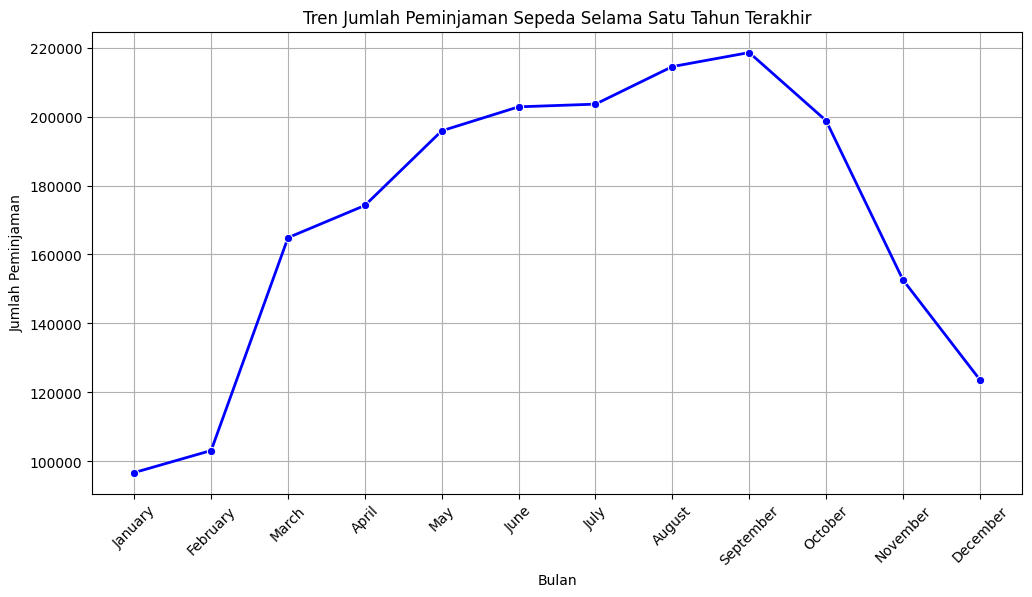

Puncak permintaan terjadi pada bulan September dengan jumlah 218573 peminjaman.


In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='nama_bulan', y='cnt', data=monthly_trend, marker='o', linewidth=2, color='b')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.title('Tren Jumlah Peminjaman Sepeda Selama Satu Tahun Terakhir')
plt.grid(True)
plt.show()

print(f"Puncak permintaan terjadi pada bulan {puncak_bulan['nama_bulan']} dengan jumlah {puncak_bulan['cnt']} peminjaman.")

### Pertanyaan 2: Bagaimana efektivitas sistem penyewaan sepeda dalam memenuhi kebutuhan transportasi pada hari kerja jika dibandingkan dengan akhir pekan?

<ipython-input-28-c7913958f087>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='kategori_hari', y='cnt', data=rata_rata_peminjaman, palette=['blue', 'orange'])


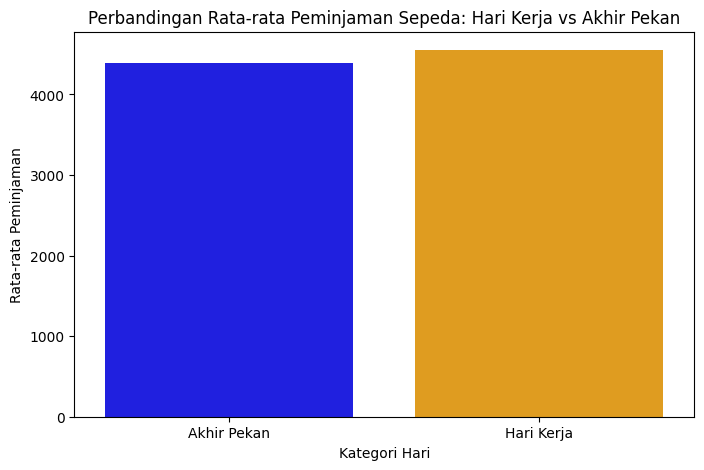

,kategori_hari,cnt
0,Akhir Pekan,4389.685714
1,Hari Kerja,4550.566219


In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x='kategori_hari', y='cnt', data=rata_rata_peminjaman, palette=['blue', 'orange'])
plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Peminjaman')
plt.title('Perbandingan Rata-rata Peminjaman Sepeda: Hari Kerja vs Akhir Pekan')
plt.show()

rata_rata_peminjaman

**Insight:**
- Jumlah peminjaman mengalami peningkatan signifikan dari Januari hingga mencapai puncaknya pada bulan September dengan total 218.573 peminjaman. Setelah itu, jumlah peminjaman mulai menurun secara bertahap hingga Desember.
- Secara keseluruhan, efektivitas sistem penyewaan sepeda cukup merata antara hari kerja dan akhir pekan, menunjukkan fleksibilitas penggunaannya baik untuk kebutuhan sehari-hari maupun rekreasi.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis tren peminjaman sepeda selama satu tahun terakhir, terlihat bahwa jumlah peminjaman mengalami peningkatan sejak awal tahun dan mencapai puncaknya pada bulan September dengan 218.573 peminjaman. Setelah itu, terjadi penurunan jumlah peminjaman hingga akhir tahun. Pola ini menunjukkan bahwa faktor musiman atau kondisi tertentu dapat mempengaruhi penggunaan sepeda, seperti cuaca atau aktivitas tertentu di bulan tersebut.
- Sementara itu, perbandingan rata-rata peminjaman sepeda pada hari kerja dan akhir pekan menunjukkan bahwa peminjaman pada hari kerja (4.550,57 peminjaman) sedikit lebih tinggi dibandingkan akhir pekan (4.389,69 peminjaman). Hal ini mengindikasikan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi harian seperti perjalanan ke tempat kerja atau sekolah, tetapi juga tetap diminati untuk rekreasi di akhir pekan.

In [29]:
all_data = pd.merge(day_data, hour_data, on='dteday', how='inner')

In [30]:
all_data.to_csv("main_data.csv", index=False)